# Data Story Exercise with scraped Yelp data of all Thai Restaurants in NYC

All Yelp pages for Thai Restaurants located in New York City were scraped and then parsed. The meta data for each restaurant was used for descriptive data analysis and visualization below.

In [18]:
#retrieve scraped Yelp data from hard drive
import pandas as pd
import os.path 
import csv
import matplotlib.pyplot as pyplot
import numpy as np

data_path = r'C:\Users\Olarn\Ipython Notebook Directory\yelp_metadata_v0_1.csv'
rest_df = pd.read_csv(data_path,  encoding = 'windows-1252')

# What is the distribution of ratings across all Thai restaurants in NYC?


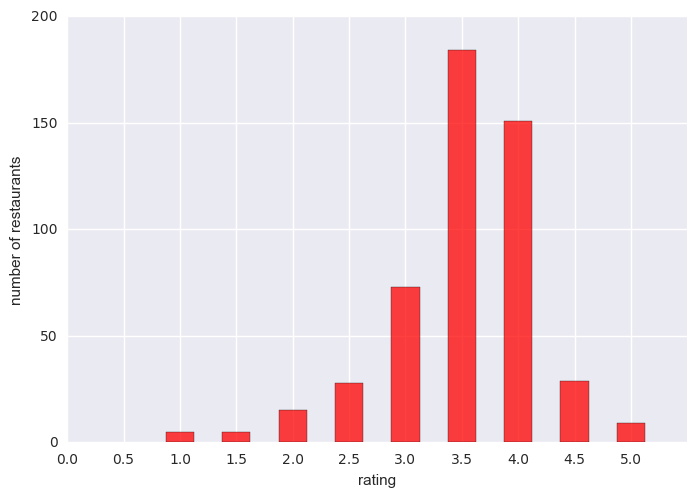

In [93]:
y = rest_df[['Clean Rating']]
series1 = y.iloc[:,0].dropna()

bin = np.arange(0,5.5,.5) + .25
pyplot.hist(series1, facecolor = 'red', alpha=.75, rwidth = .5, bins = bin)
pyplot.xlabel('rating')
pyplot.ylabel('number of restaurants')
pyplot.xticks(np.arange(0,5.5,.5))
pyplot.xlim([0,5.5])
pyplot.show()

In [79]:
#calculate mean and standard deviation of ratings received by Thai restaurants in NYC
avg, std = np.mean(y), np.std(y)
print(avg)
print(std)

Clean Rating    3.517034
dtype: float64
Clean Rating    0.661124
dtype: float64


KEY INSIGHTS: 
1. The average Thai restaurant in NYC received a rating of 3.5. 
2. From the histogram, most Thai restaurants in NYC received a rating of 3.5 or 4.0.

CONSIDERATIONS:

    Given that the average Thai restaurant in NYC received a rating of 3.5, does this imply that most Thai restaurants in NYC are above the average (above a 3.0 rating)? Or is Thai cuisine (as a whole) generally rated higher and more liked by NYC residents when compared to other cuisines? 

    If 3.5 is the "true" average for Thai food in NYC, should we consider recalibrating the average for Thai restaurants to 3.5 (instead of 3.0) to truly discover elite Thai food? 

# Do restaurants that receive more reviews generally receive higher ratings?

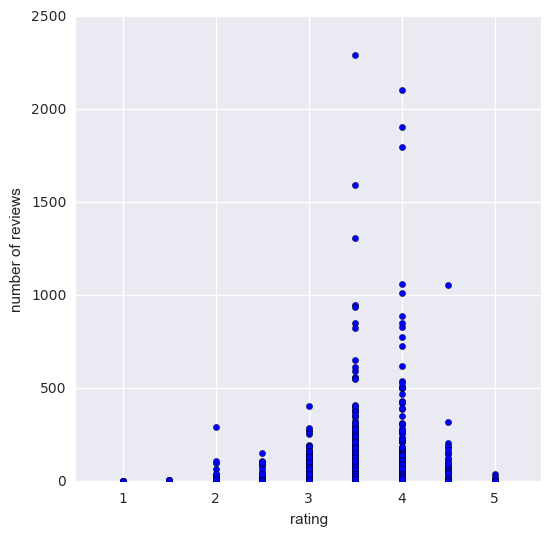

In [90]:
import pandas as pd
df1 = pd.DataFrame(rest_df['Review Count Num'])
df2 = pd.DataFrame(rest_df['Clean Rating'])

graph_df = pd.concat([df1,df2],axis = 1).dropna()
x = graph_df[['Review Count Num']]
y = graph_df[['Clean Rating']]

import matplotlib.pyplot as pyplot

fig,axes = pyplot.subplots(figsize=(6,6))
axes.scatter(y,x,)
pyplot.xlabel('rating')
pyplot.ylabel('number of reviews')
axes.set_ylim([0,2500])
axes.set_xlim([.5,5.5])
pyplot.show()

KEY INSIGHTS:
1. Restaurants that receive over 500 reviews always receive ratings of 3.5 or higher!
2. Restuarants that receive a 5.0/5.0 rating have a significantly lower review count when compared to restaurants rated 4.5 or lower. 

CONSIDERATIONS:

    Should restaurants that receive a 5.0/5.0 rating be given less credit because they'eve received less reviews?  
    
    How does this graph represent restaurants who may have improved their restaurant ratings over time? I beleive that restaurants that have improved their ratings over time will average out to a 3.5 or 4.0.
   
   

# How many reviews do restaurants that receive a rating of 3.5 stars or higher typically get?

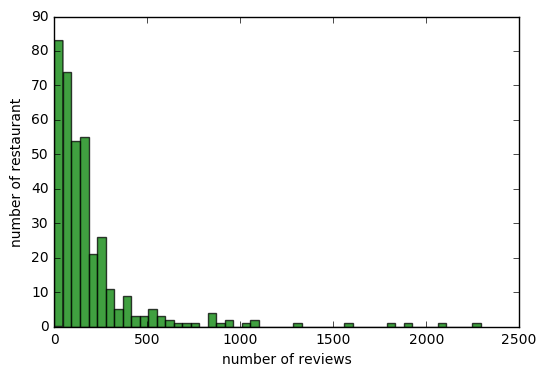

In [86]:
#Histogram 
import matplotlib.pyplot as pyplot
from scipy.stats import stats
import numpy as np

good_restaurant = rest_df[rest_df['Clean Rating'] >= 3.5]
good_restaurant_review_count = sorted(good_restaurant['Review Count Num'])

pyplot.hist(good_restaurant_review_count, facecolor = 'green', alpha=.75, bins = 50)
pyplot.xlabel('number of reviews')
pyplot.ylabel('number of restaurant')
pyplot.show()


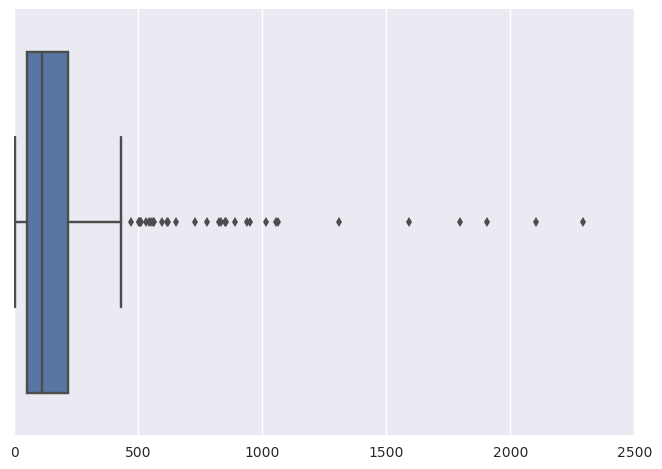

193.297587131 281.402957658


In [91]:
#Box and Whisker Plot
import seaborn as sns
sns.boxplot(good_restaurant_review_count)
pyplot.show()

mean = np.mean(good_restaurant_review_count)
std = np.std(good_restaurant_review_count)
print(mean, std)

KEY INSIGHTS:
1. Thai restaurants rated 3.5 stars or higher, on average, receive 193 reviews.
2. As expected, most restaurants have not received more than 500 reviews and we observe the majority of restaurants below 250 reviews. 

CONSIDERATIONS:

    Should restaurants that receive a 5.0/5.0 rating be given less credit because they'eve received less reviews?  
    
    How does this graph represent restaurants who may have improved their restaurant ratings over time? I beleive that restaurants that have improved their ratings over time will average out to a 3.5 or 4.0, but will find much difficulty in ever reaching a 4.5 rating. 

   
   

# Do restaurants with over 500 reviews generally represent more than one cuisine, or serve more than just Thai food?

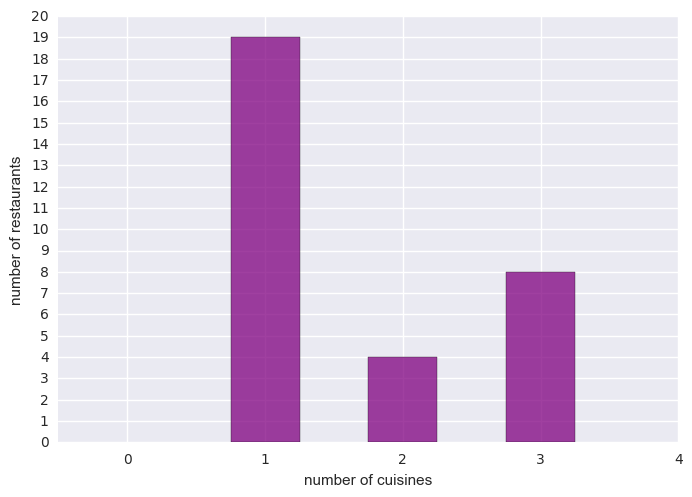

1.64516129032 0.863166978081


In [92]:
import ast

pop_rest = rest_df[rest_df['Review Count Num'] >= 500]
cuisine_pop_rest = pop_rest['Cuisines']
cuisine_pop_rest = [ast.literal_eval(x) for x in cuisine_pop_rest]

cuisine_count = []
for restaurant in cuisine_pop_rest:
    cuisine_count.append(len(restaurant))

bin = np.arange(5) - .5
pyplot.hist(cuisine_count, facecolor = 'purple', alpha=.75, bins = bin, rwidth = .5)
pyplot.xlabel('number of cuisines')
pyplot.ylabel('number of restaurants')
pyplot.xticks(range(5))
pyplot.yticks(range(21))
pyplot.show()

mean = np.mean(cuisine_count)
std = np.std(cuisine_count)
print(mean, std)

KEY INSIGHTS:
1. Most restaurants that received over 500 reviews served only Thai food.
2. However, most restaurants that did cater to more than one Cuisine chose to represent 3 cuisines rather than 2. 


ADDITIONAL CONSIDERATIONS:

    For restaurants that represent more than 1 cuisine, should their revivews be weighted less because they don't represent purely Thai cuisine? 
    
    What other factors might affect the number of reviews a restaurant might receive? (e.g. is the location of the restaurant a major factor to consider?)
   